# Homework 4: Fraud Detection

*In this homework, you are going to work with a credit card transaction dataset.*

**Submission Instructions**

---
It is important that you follow the submission instructions. 
1. Copy this assignment notebook to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_hw4`</font>.

2. Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

3. **Do not delete your outputs. They are essential for the grading. Make sure that cells containing your solutions are executed, and the results are displayed in the notebook.**

4. When you're done, please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


*   Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
*   Then submit the downloaded <font color="red">`.ipynb`</font> version of your work on SUCourse.

For any question, you may send an email to the TAs and LAs.

---

In this homework, you will work on a dataset about credit card frauds.

For this homework, you will use the provided file `creditcard_fraud.csv`. Feature engineering had already been applied to the dataset and informative features created. Names of these features are hidden for secrecy purposes to protect user identity.

Below, you can find all the set of features, provided in the dataset:
*   **Known Features**
    * time: Number of seconds elapsed between this transaction and the first transaction in the dataset
    * amount: Transaction amount

*   **Other Features**
    * V1 - V28: Hidden transaction features to protect user identities

*   **Target**
    * Class: 1 for Fraudulent transactions, 0 otherwise
    

    
*Do not forget to add the shared `creditcard_fraud.csv` file to your drive and mount to your drive. Otherwise, you won't be able to read the file.*

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

# You can change this to the correct path
path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
filename = "creditcard_fraud.csv"
df = pd.read_csv(join(path_prefix, filename))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Q1 - Ratio Between Fraudalent and Non-Fraudalent Transactions (5 Points)

The dataset is imbalanced so that non-frauds are dominant in the data. In this part you are asked to plot a pie chart and show the ratio between fraudalent and non-fraudalent transactions. Your output should be like: 

<img src="https://i.ibb.co/7KpVFG9/pie.png" alt="pie" border="0" width="300">



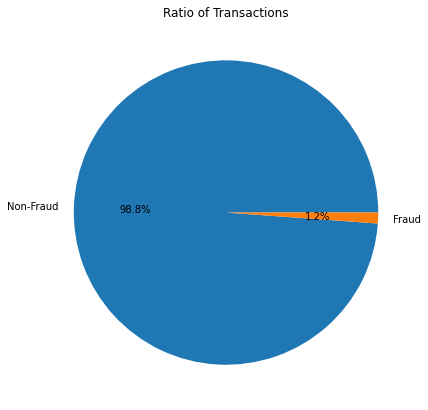

In [ ]:
# Your Code

col = ['Non-Fraud', 'Fraud']
 
data = [df[df["Class"] == 0].size, df[df["Class"] == 1].size]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.title("Ratio of Transactions")
plt.pie(data, labels = col, autopct='%1.1f%%')
 
# show plot
plt.show()

## Q2 - Split the data into train (60%), validation (20%) and test (20%). (5 Points)

Use `train_test_split` with `random_state` parameter set to 0. Drop `Time` column since it doesn't give any information.

***Important:** Do not forget that the data is imbalanced so you should handle that with stratified splitting. Search how you can do this with `train_test_split` function*

In [ ]:
# Your Code
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedShuffleSplit

new_df = df.drop("Time", axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns="Class"), new_df["Class"], test_size=0.4, random_state=0) 
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0) 

## Q3 - Build 2 Baseline Models (5 Points)

You are going to build a Random Forest and a Gradient Boosting model. Set random_state = 0. Then fit the model with training data.

In [ ]:
#Your Code

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#For RandomForest model
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

#For GradientBoosting model
boost = GradientBoostingClassifier(n_estimators=100, random_state=0)
boost.fit(X_train, y_train)

#print(boost.score(X_test, y_test))
#forest_pred = forest.predict(X_test)

GradientBoostingClassifier(random_state=0)

## Q4 - Evaluate the Baseline Model (30 Points)

There are some functions below already imported for you. You can use those functions to find results but of course there are other ways too. Those are given for you to give hints. 

### Part 1 - Plot Confusion Matrix (10 Points)

In this part you are asked to plot the Confusion Matrix for both Random Forest and Gradient Boosting model for the predictions made on the validation data. These outputs should be side by side. You can use subplots from matplotlib. 

**Note**: There are many ways to use subplots, so don't stick with one of them if it doesn't work. Two libraries are given to you for confusion matrix. However, you are free to use any other or implement it yourself. The colors of the confusion matrix don't have to be the same with the expected output.


<img src="https://i.ibb.co/JrknyR8/conf2.png" alt="conf2" border="0" width="600">

*Please keep in mind that this confusion matrix might be different than what you will get due to randomness.*

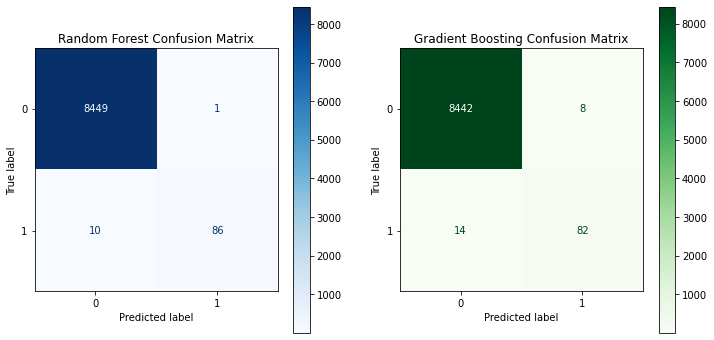

In [ ]:
# Your Code
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


# Conf matrix for Random Forest
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot_confusion_matrix(forest, X_valid, y_valid, ax=ax1, cmap='Blues')

# Conf matrix for Gradient Boost
plot_confusion_matrix(boost, X_valid, y_valid, ax=ax2, cmap='Greens')


ax1.set_title('Random Forest Confusion Matrix')
ax2.set_title('Gradient Boosting Confusion Matrix')
plt.show()

### Part 2 - Plot ROC Curve Evaluated on Validation Data (20 Points)

In this part you are asked to plot ROC curve of these two model's output on the validation data. You can see the expected format below.


<img src="https://i.ibb.co/5BZKHd1/curves.png" alt="curves" border="0" width="500">

*Please keep in mind that this plot might be different than what you will get due to randomness.*

<Figure size 432x288 with 0 Axes>

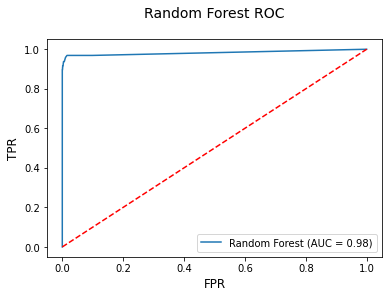

<Figure size 432x288 with 0 Axes>

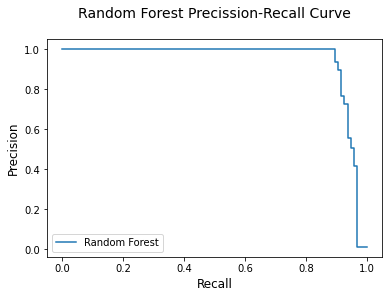

<Figure size 432x288 with 0 Axes>

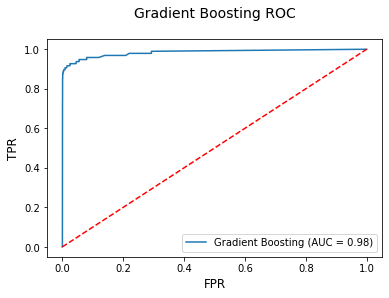

<Figure size 432x288 with 0 Axes>

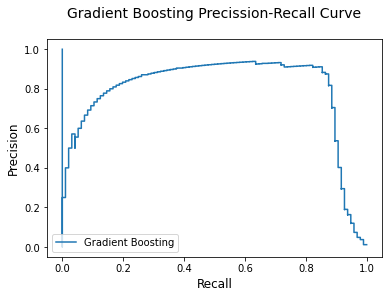

In [ ]:
# Your Code
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve

# fig, axs = plt.subplots(2, 2, figsize=(12, 6))
# axes = [ axs[0][0],axs[0][1],axs[1][0],axs[1][1] ]

# Compute the ROC curve and AUC for the Random Forest model
fpr, tpr, thresholds = roc_curve(y_valid, forest.predict_proba(X_valid)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the Random Forest model
plt.figure()
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
roc_display.plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.text(0.5, 1.1, 'Random Forest ROC', fontsize=14, horizontalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)



# Compute the precision-recall curve for the Random Forest model
precision, recall, thresholds = precision_recall_curve(y_valid, forest.predict_proba(X_valid)[:, 1])

# Plot the precision-recall curve for the Random Forest model
plt.figure()
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='Random Forest')
pr_display.plot()
plt.text(0.5, 1.1, 'Random Forest Precission-Recall Curve', fontsize=14, horizontalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)

# Compute the ROC curve and AUC for the Gradient Boosting model
fpr, tpr, thresholds = roc_curve(y_valid, boost.predict_proba(X_valid)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the Gradient Boosting model
plt.figure()
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gradient Boosting')
roc_display.plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.text(0.5, 1.1, 'Gradient Boosting ROC', fontsize=14, horizontalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('FPR', fontsize=12)
plt.ylabel('TPR', fontsize=12)

# Compute the precision-recall curve

# Compute the precision-recall curve for the Gradient Boosting model
precision, recall, thresholds = precision_recall_curve(y_valid, boost.predict_proba(X_valid)[:, 1])

# Plot the precision-recall curve for the Gradient Boosting model
plt.figure()
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name='Gradient Boosting')
pr_display.plot()
plt.text(0.5, 1.1, 'Gradient Boosting Precission-Recall Curve', fontsize=14, horizontalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)

# Show the plots
plt.show()

## Q5 - Hyperparameter Tuning (40 Points)

### Part 1: Getting Hyperparameter Tuning Results (30 Points)

Now that you trained the default model and see the results, it is time to make it better with hyperparameter tuning. To evaluate the model performances you need to use AUPRC(Area Under Precision-Recall Curve). To this end, store AUPRC values for each model then decide which parameters are the best to use.

Here, you are asked to tune hyperparameters in two steps. 

**Step 1:**

In the first step, train different models dfor both algorithm separately only changing number of estimators.

Use the following values for this step:
```
'n_estimators': [50,100,300,500]
```
**Step 2:**

In the second step, train different models **only** changing max_features values. You should use the best value for the `n_estimators` that you obtained in the first step. (The best value of `n_estimators` can be different for 2 algorithm)

Use the following values for this step:
```
'max_features': [5,7,10,25]
```

**Remember that positive class is fraudalent ones.**


<img src="https://i.ibb.co/kqQqcXS/model-results.png" alt="model-results" border="0" width="350">

*Please keep in mind that this results might be different than what you will get due to randomness.*

In [ ]:
# Your Code
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

# Set up the grid search for the Random Forest model
parameters = { 'n_estimators': [50, 100, 300, 500], 'max_features': [5, 7, 10, 25] }

model = RandomForestClassifier(random_state=0)
GSCV = GridSearchCV(model, parameters, cv=5, scoring='average_precision')

# Fit the grid search to the training data
GSCV.fit(X_train, y_train)

# Get the best parameters and best score
best_params = GSCV.best_params_
best_score = GSCV.best_score_

# Print the results for the Random Forest model
print("Random Forest:")

# Print the AUPRC scores for each n_estimators
for n_estimators, score in zip(parameters['n_estimators'], GSCV.cv_results_['mean_test_score']):
    print("n_estimators {} , AUPRC score: {}".format(n_estimators, score))

# Print the best n_estimators
print("Best n_estimators for Random Forest = {}".format(best_params['n_estimators']))

# Print the AUPRC scores for each max_features with the best n_estimators
best_est = GSCV.best_estimator_
y_pred = best_est.predict_proba(X_valid)[:, 1]
score = average_precision_score(y_valid, y_pred)
for max_features, score in zip(parameters['max_features'], GSCV.cv_results_['mean_test_score']):
    print("n_estimators {} max_features {} , AUPRC score: {}".format(best_params['n_estimators'], max_features, score))

print("For Random Forest, best n_estimators = {} and best max_features = {}".format(best_params['n_estimators'], best_params['max_features']))

# Set up the grid search for the Gradient Boosting model
parameters2 = { 'n_estimators': [50, 100, 300, 500], 'max_features': [5, 7, 10, 25] }

model = GradientBoostingClassifier(random_state=0)
GSCV = GridSearchCV(model, parameters2, cv=5, scoring='average_precision')

# Fit the grid search to the training data
GSCV.fit(X_train, y_train)

# Get the best parameters and best score
best_params = GSCV.best_params_
best_score = GSCV.best_score_

# Print the results for the Random Forest model
print("Gradient Boosting:")

# Print the AUPRC scores for each n_estimators
for n_estimators, score in zip(parameters2['n_estimators'], GSCV.cv_results_['mean_test_score']):
    print("n_estimators {} , AUPRC score: {}".format(n_estimators, score))

# Print the best n_estimators
print("Best n_estimators for Gradient Boosting = {}".format(best_params['n_estimators']))

# Print the AUPRC scores for each max_features with the best n_estimators
best_est = GSCV.best_estimator_
y_pred = best_est.predict_proba(X_valid)[:, 1]
score = average_precision_score(y_valid, y_pred)
for max_features, score in zip(parameters2['max_features'], GSCV.cv_results_['mean_test_score']):
    print("n_estimators {} max_features {} , AUPRC score: {}".format(best_params['n_estimators'], max_features, score))

print("For Gradient Boosting , best n_estimators = {} and best max_features = {}".format(best_params['n_estimators'], best_params['max_features']))

### Part 2 - Plotting Results (10 PTS)

You can see that the AUPRC scores may be better when max_features is not set than when we set it. This is because the default value of max_features might work better. However, for now, we will proceed with the results of the values we have determined.

Plot `n_estimators` vs AUPRC scores and `max_features` vs AUPRC scores using validation data with subplots. Please check the expected output to see the format

Your plots should look like below. Remember these plots are based on random allocations so it is highly possible that the values you get will not be exactly the same. However, structures should be the same.


***Hint:** You can set yticks as np.around(np.linspace(0.7,1),decimals=2) to have similar plots.*


<img src="https://i.ibb.co/9y8ZJpp/hyp-plot.png" alt="hyp-plot" border="0">

*Please keep in mind that these plots might be different than what you will get due to randomness.*

In [ ]:
from sklearn.metrics import average_precision_score

y_pred = model.predict(X_test)
auprc = average_precision_score(y_test, y_pred)

for n_estimators in [50,100,300,500]:
    for max_features in [5,7,10,25]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        auprc = average_precision_score(y_test, y_pred)

        auprc_values[(n_estimators, max_features)] = auprc


NotFittedError: ignored

## Q6 - Evaluate on Test Data (20 PTS)

Here, you are asked to evaluate the final model using the test data. Select the best model among these 2 different algorithms and its best num_estimator and max features. 

### Retrain the Model

Retrain your model combining train + validation data with using the hyperparameters you have chosen (best). This part has no points but it's necessary to do the upcoming parts

In [ ]:
# Your Code 
best_est = 'random_forest'
best_n_estimators = 300
best_max_features = 7

# Retrain the model on the combined train and validation data
if best_est == 'random_forest':
    model = RandomForestClassifier(n_estimators=best_n_estimators, 
                                   max_features=best_max_features, 
                                   random_state=0)
else:
    model = GradientBoostingClassifier(n_estimators=best_n_estimators, 
                                       max_features=best_max_features, 
                                       random_state=0)
    
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict_proba(X_test)[:, 1]

# Compute the precision-recall curve and AUPRC score
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
auprc = auc(recall, precision)

# Print the AUPRC score for the test data
print("AUPRC score for test data: {}".format(auprc))



### Part 1 - Plot Confusion Matrix (10 Points)

Expected Output:

<img src="https://i.ibb.co/mNKZj6q/test-conf.png" alt="test-conf" border="0" width="300">

*Please keep in mind that this confusion matrix might be different than what you will get.*

Text(0.5, 1.0, 'Confusion Matrix Evaluated on Test Data')

<Figure size 432x288 with 0 Axes>

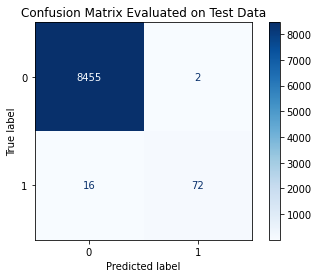

In [ ]:
# Your Code
plt.figure()

plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

plt.title('Confusion Matrix Evaluated on Test Data')

### Part 2 - Plot ROC Curve and Precision-Recall Curve Evaluated on Test Data (10 Points)

Expected Output:

<img src="https://i.ibb.co/9tTNp5j/test-plot.png" alt="test-plot" border="0" width="500">

*Please keep in mind that these plots might be different than what you will get due to randomness.*

In [ ]:
forest.predict_proba(X_test)

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [ ]:
# Your Code
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])

plt.figure()

plt.plot(fpr, tpr, 'b-')

plt.plot([0, 1], [0, 1], linestyle='--', color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')

precision, recall, thresholds = precision_recall_curve(y_test, forest.predict_proba(X_test)[:, 1])

plt.figure()

plt.plot(recall, precision, 'b-')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Random Forest Precision-Recall Curve')
